In [11]:
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [12]:
# Routes
test_dir = '../data/raw/test'
raw_train_dir = '../data/raw/train'
processed_train_dir = '../data/processed/train'

<h4>Optimizar modelo</h4>

In [13]:
model = Sequential()

# Input Layer
model.add(Input(shape=(200, 200, 3)))

# Layer 1 - 32 filters
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Layer 2 - 64 filters
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Layer 3 - 128 filters
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(units=512, activation="relu", kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation="softmax"))

# Compilation
model.compile(optimizer=Adam(learning_rate=0.0003),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
trdata = train_datagen.flow_from_directory(
    processed_train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 20000 images belonging to 2 classes.


In [17]:
tsdata = train_datagen.flow_from_directory(
    processed_train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 5000 images belonging to 2 classes.


<h4>Entrenamiento del modelo</h4>

In [18]:
history = model.fit(
    trdata,
    steps_per_epoch=trdata.samples // trdata.batch_size,
    epochs=10,
    validation_data=tsdata,
    validation_steps=tsdata.samples // tsdata.batch_size
)

c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5792 - loss: 2.9454

c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 2217s 4s/step - accuracy: 0.5792 - loss: 2.9428 - val_accuracy: 0.6012 - val_loss: 0.9161
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2293s 4s/step - accuracy: 0.6411 - loss: 0.7355 - val_accuracy: 0.6522 - val_loss: 0.7571
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2145s 3s/step - accuracy: 0.6724 - loss: 0.7007 - val_accuracy: 0.6777 - val_loss: 0.7242
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1980s 3s/step - accuracy: 0.6970 - loss: 0.6808 - val_accuracy: 0.7139 - val_loss: 0.6435
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1957s 3s/step - accuracy: 0.7147 - loss: 0.6467 - val_accuracy: 0.6979 - val_loss: 0.6743
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1956s 3s/step - accuracy: 0.7386 - loss: 0.6291 - val_accuracy: 0.6767 - val_loss: 0.8717
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1956s 3s/step - accuracy: 0.7577 - loss: 0.6130 - val_accuracy: 0.7666 - val_loss: 0.6036
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1960s 3s/step - accuracy: 0.7794 - loss: 0.6038 - val_accurac

In [19]:
model.save('../models/second-optimized-model.keras')

<h4>Datos del entrenamiento</h4>
Duración total: 2h55m

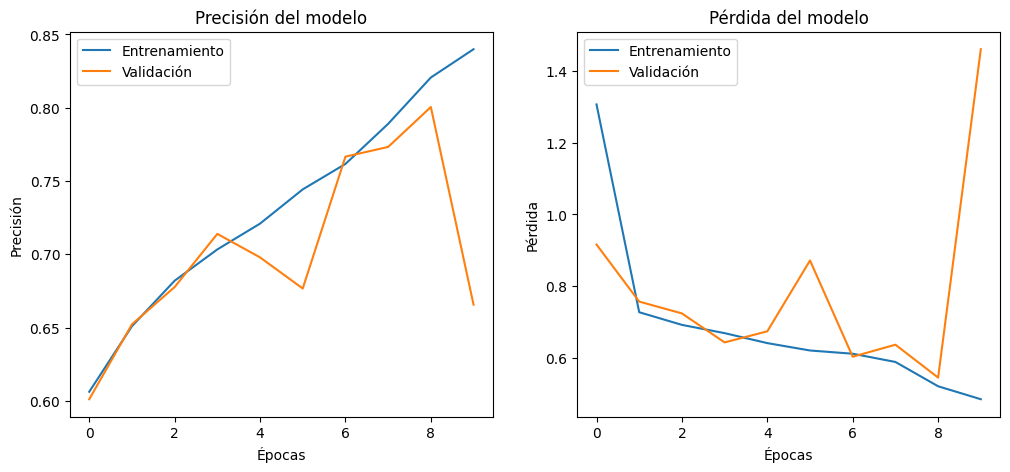

In [20]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [21]:
modelFitData = {
    'epoch1': {'accuracy': 0.5792, 'loss': 2.9428, 'val_accuracy': 0.6012, 'val_loss': 0.9161},
    'epoch2': {'accuracy': 0.6411, 'loss': 0.7355, 'val_accuracy': 0.6522, 'val_loss': 0.7571},
    'epoch3': {'accuracy': 0.6724, 'loss': 0.7007, 'val_accuracy': 0.6777, 'val_loss': 0.7242},
    'epoch4': {'accuracy': 0.6970, 'loss': 0.6808, 'val_accuracy': 0.7139, 'val_loss': 0.6435},
    'epoch5': {'accuracy': 0.7147, 'loss': 0.6467, 'val_accuracy': 0.6979, 'val_loss': 0.6743},
    'epoch6': {'accuracy': 0.7386, 'loss': 0.6291, 'val_accuracy': 0.6767, 'val_loss': 0.8717},
    'epoch7': {'accuracy': 0.7577, 'loss': 0.6130, 'val_accuracy': 0.7666, 'val_loss': 0.6036},
    'epoch8': {'accuracy': 0.7794, 'loss': 0.6038, 'val_accuracy': 0.7732, 'val_loss': 0.6371},
    'epoch9': {'accuracy': 0.8173, 'loss': 0.5273, 'val_accuracy': 0.8005, 'val_loss': 0.5454},
    'epoch10': {'accuracy': 0.8350, 'loss': 0.4877, 'val_accuracy': 0.6657, 'val_loss': 1.4601}
}

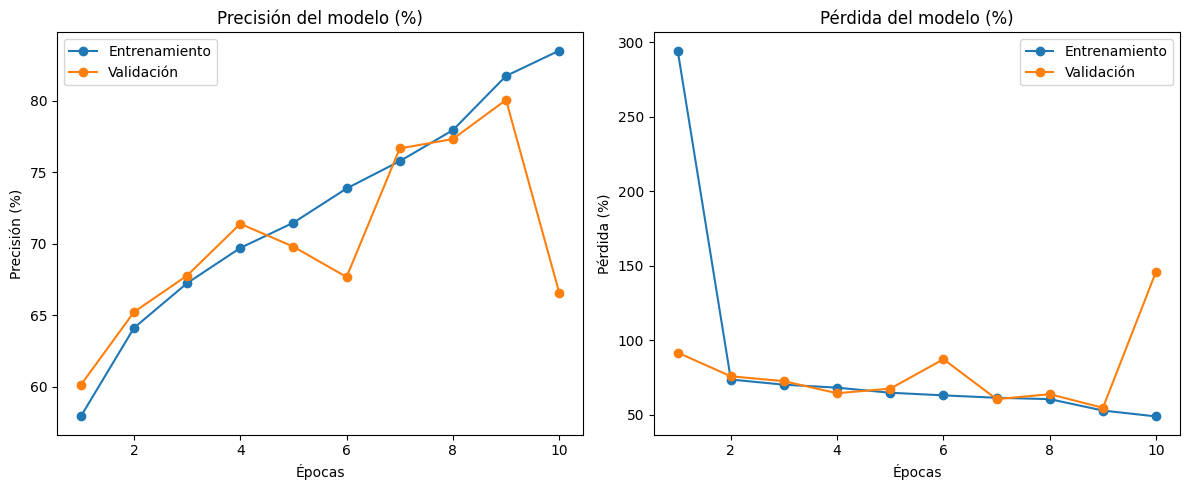

In [22]:
epochs = list(range(1, 11))
accuracy = [modelFitData[f'epoch{i}']['accuracy'] * 100 for i in epochs]
val_accuracy = [modelFitData[f'epoch{i}']['val_accuracy'] * 100 for i in epochs]
loss = [modelFitData[f'epoch{i}']['loss'] * 100 for i in epochs]
val_loss = [modelFitData[f'epoch{i}']['val_loss'] * 100 for i in epochs]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Entrenamiento', marker='o')
plt.plot(epochs, val_accuracy, label='Validación', marker='o')
plt.title('Precisión del modelo (%)')
plt.xlabel('Épocas')
plt.ylabel('Precisión (%)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Entrenamiento', marker='o')
plt.plot(epochs, val_loss, label='Validación', marker='o')
plt.title('Pérdida del modelo (%)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (%)')
plt.legend()

plt.tight_layout()
plt.show()